#### IMPORTING NECASSARY LIBRARIES

In [ ]:
#objecti floata çevirme
merge_3["Transaction-ID"] = pd.to_numeric(merge_3["Transaction-ID"], errors='coerce')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font color=red> Review the Source Documentation
</font>
1. cab data : describing attributes of Transactions like Companies, Km travelled, price charged etc.
2. Customer ID data : consists of uniques customer ids with their ages and income.
3. Transaction ID data : Consists of unique Transaction Ids with the payment mode.
4. City Data : Consists of various cities, their populations and number of users.

<font color=blue>cab_data DataFrame
</font>

In [2]:
cab_data = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\Cab_Data.csv")
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


<font color=red>Understand the field names and data types of cab_data DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**Transaction ID** observation represents the unique transaction id for each trip. <br>
**Date of Travel** observation represents the customer's travel date in the MS Excel format. We'll change it to the regular datetime format with read_date() function later. <br>
**Company** observation includes the potential cab industries that XYZ planns to invest in, Pink Cab and Yellow Cab. <br>
**City** observation contains the list of US cities relevant to our case. <br>
**KM Travelled** observation represents the travelled KM for each customer. <br>
**Price Charged** observation represents the revenue for each travel.<br>
**Cost of Trip** observation represents the expense for each travel.

In [4]:
cab_data.shape

(359392, 7)

cab_data contains of 359392 rows and 7 columns.

In [4]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

To understand data types of cab_data, I used Pandas' `.dtypes` function. <br>
* Dtypes of Transaction ID and Date of Travel observations' are int64, <br>
* Dtypes of Company and City observations' are object, <br>
* KM Travelled, Prica Charged and Cost of Trip observations' are float64. 

Summary statistics of cab_data

In [8]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


<font color=blue>city DataFrame
</font>

In [3]:
city = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\City.csv")
city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


<font color=red>Understand the field names and data types of city DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**City** observation contains the list of US cities relevant to our case. cab_data df also has the city observation. This means that we are going to merge cab_data and city on City observation. <br>
**Population** observation represents the population of each city. <br>
**Users** observation represents the cab users' population from each city.

In [11]:
city.shape

(20, 3)

city df has 20 rows & 3 columns.

In [12]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

To understand data types of city, I used Pandas' `.dtypes` function. <br>
* Dtypes of all observations in the city dataframe are object. <br>

Summary Statistics of city df

In [6]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,PITTSBURGH PA,"959,307","302,149"
freq,1,1,1


<font color=blue>customer_id DataFrame
</font>

In [4]:
customer_id = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\Customer_ID.csv")
customer_id.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


<font color=red>Understand the field names and data types of customer_id DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**Customer ID** observation represents the unique customer ID for each customer.<br>
**Gender** observation represents the gender of each customer. <br>
**Age** observation represents the age of each customer.

In [15]:
customer_id.shape

(49171, 4)

customer_id DataFrame has 49171 rows and 4 columns.

In [16]:
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

To understand data types of customer_id, I used Pandas' `.dtypes` function. <br>
* Dtypes of Customer ID, Age, and Income observations' are int64, <br>
* Dtype of Gender observation is object. <br> 

<font color=blue>transaction_id DataFrame
</font>

In [5]:
transaction_id = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w2\\DataSets-main\\Transaction_ID.csv")
transaction_id.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


<font color=red>Understand the field names and data types of transaction_id DataFrame
</font> <br>
To understand the field names, I imported CSV file. <br>
**Transaction ID** observation represents the unique transaction id for each trip. cab_data also has Transaction ID, thus transaction_id and cab_data DataFrames can be merged on Transaction ID column <br>
**Customer ID** observation represents the unique customer ID for each customer. customer_id also has Customer_ID observation hence we are going to merge these two DataFrames on Customer ID column.<br>
**Payment_Mode** observation represents the payment mode for each transaction. It can either be Cash or Card.

In [18]:
transaction_id.shape

(440098, 3)

transaction_id DataFrame has 440098 rows and 3 columns.

In [21]:
transaction_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

To understand data types of transaction_id, I used Pandas' `.dtypes` function. <br>
* Dtypes of Customer ID, and Transaction ID observations' are int64, <br>
* Dtype of Payment_Mode observaiton is object. <br> 

<font color=red>Identify relationships across the files
</font> <br>
* **customer_id** DataFrame includes the customer related knowledge such as `Customer_ID`, `Age`, `Income` and `Gender`. Moreover, **transaction_id** DataFrame contains of transaction related knowledge such as `Customer_ID`, `Payment_Mode` and `Transaction_ID`. These two DataFrames are related with `Customer ID` observation.
* **cab_data** DataFrame includes the trip related knowledge such as `Transaction ID` of the trip, `Date of Travel`, `KM Travelled` during the trip, `Price Charged`for each trip, `Cost of Trip`, `Company` that each cab belongs to, and `City` that trip was made. In the meantime, **city** DataFrame is all about city related knowledge like `City` of the trip,	`Population`of that city,	Pink and Yellow Cab Company `Users` within the city. In this case, **cab_data** and **city** DataFrames are related with `City`observation.
	

<font color=red>Determine which files should be joined versus which ones should be appended
</font> <br>
* Instead of `pd.join`, I am going to use `pd.merge` to merge DataFrames because every DataFrame has one common column. In join, I need to state the same column with lsuffix and rsuffix.(https://stackoverflow.com/a/54955652/13852388) This will create extra burden so I am not going to do it.
* Instead of `pd.append`, I am going to use `pd.merge` because there is no `on` option of `pd.append`(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) . This will cause double print of same columns. Revealing same data is just a burden for our merged DataFrames. 
* **customer_id** DataFrame and **transaction_id** DataFrames both have `Customer_ID` observation. Thus, we are going to merge these two DataFrames on `Customer_ID` observation and name this merge as `merge_1`
* **cab_data** and **city** DataFrames both have`City` observation. Hence, we are going to merge these two DataFrames on `City`observation and name it as `merge_2`

#### MERGE 1

In [6]:
merge_1 = customer_id.merge(transaction_id, on="Customer ID", how = "outer")
merge_1

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


#### MERGE 2

In [7]:
merge_2 = cab_data.merge(city, on = "City", how = "outer")
merge_2

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701"
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701"
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...
359388,10440104.0,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001"
359389,10440105.0,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001"
359390,10440106.0,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001"
359391,10440107.0,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,"418,859","127,001"


<font color=red>Create master data and explain the relationship
</font> <br>
To create master data, I am going to merge `merge_1` and `merge_2` DataFrames and create `merge_3` : the master data. <br>
`merge_3` will include 
* `Customer_ID`, `Age`, `Income` and `Gender`observations from `customer_id` DataFrame,
* `Customer_ID`, `Payment_Mode` and `Transaction_ID` observations from `transaction_id` DataFrame,
* `Transaction ID` , `Date of Travel`, `KM Travelled` , `Price Charged`, `Cost of Trip`, `Company`  and `City` observations from `cab_data` DataFrame, 
* and `City`,`Population`,	 `Users` observations from `city` DataFrame.
* As I merged these DataFrames on the same observation, there will be no duplicated values. Thus, there will be no need for <font color=red>Identify and remove duplicates
</font>  step.

#### MERGE 3

In [72]:
merge_3 = merge_2.merge(merge_1,on= "Transaction ID",how = "outer")
merge_3

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182.0,Male,33.0,8536.0,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440094,10439406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382.0,Female,51.0,18919.0,Card
440095,10439409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420.0,Female,18.0,4531.0,Card
440096,10439413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888.0,Male,23.0,3226.0,Card
440097,10439418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456.0,Male,20.0,30662.0,Cash


In [73]:
merge_3["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

<font color=red>Feature transformation
</font> <br>
I am going to make feature transformation in 5 steps. In the feature transformation, I referanced this article(https://towardsdatascience.com/feature-transformation-for-data-scientists-3a9eed562752) from the towardsdatascience 
1. **Data Imputation**
In this step, I'll detect and replace the NA values. In other words, I'll make <font color=red>NA Value Analyse
</font> To analyse NA Values, `pd.fillna()` could be used. However, `pd.fillna()`only replace NA values with one data type, and this is not useful our case because our master data(merge_3) includes more than one data type. `pd.fillna()` can also cause errors for some ML Algorithms. Thus, my choice will be Sklearns `SimpleImputer`. <br>
SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. In this case, we'll replace our NaN values with using the mean along each column. <br>

In [9]:
from sklearn.impute import SimpleImputer

In [83]:
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imr = imr.fit(merge_3)

In [84]:
imputed_data = imr.transform(merge_3)

In [85]:
merge_3 = pd.DataFrame(imputed_data)

In [29]:
merge_3.head(3)

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,1e+07,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,1e+07,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,1e+07,42371,Pink Cab,ATLANTA GA,9.04,125.2,97.632,"814,885","24,701",28712,Male,53,11242,Cash


In [86]:
merge_3 = merge_3.rename(columns={0:"Transaction-ID",	1:"Date-of-Travel",	2:"Company", 3:"City",	4:"KM-Travelled",	5:"Price-Charged",	6:"Cost-of-Trip",	7:"Population",	8:"Users",	9:"Customer-ID"	, 10:"Gender",	11:"Age",	12:"Income(USD/Month)",	13:"Payment_Mode"})

In [14]:
merge_3.isnull().values.any()

False

Seems that we have no NaN values, all the NaN values are replaced with the most frequent value of each column.

**2. Data Encoding** <br>
The computer reads numbers, even the most complex ones. It is much easier to understand numerical data rather than categorical, which is why I'll encode data.


First, I am going to encode Company Column.
* 0 represents the **Pink Cab**
* 1 represents the **Yellow Cab**

In [87]:
merge_3 = merge_3.replace({"Company":{"Pink Cab":0,"Yellow Cab":1}})
merge_3.head()

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,1e+07,42377,0.0,8,30.45,370.95,313.635,"814,885","24,701",29290,1,28,10813,1
1,1e+07,42375,0.0,8,28.62,358.52,334.854,"814,885","24,701",27703,1,27,9237,1
2,1e+07,42371,0.0,8,9.04,125.2,97.632,"814,885","24,701",28712,1,53,11242,0
3,1e+07,42376,0.0,8,33.17,377.4,351.602,"814,885","24,701",28020,1,23,23327,0
4,1e+07,42372,0.0,8,8.73,114.62,97.776,"814,885","24,701",27182,1,33,8536,1


Now, it is time to encode Cities. But first, let's find out how many cities we have and what are the name of these cities.

In [44]:
merge_3["City"].value_counts()

NEW YORK NY         180591
CHICAGO IL           56625
LOS ANGELES CA       48033
WASHINGTON DC        43737
BOSTON MA            29692
SAN DIEGO CA         20488
SILICON VALLEY        8519
SEATTLE WA            7997
ATLANTA GA            7557
DALLAS TX             7017
MIAMI FL              6454
AUSTIN TX             4896
ORANGE COUNTY         3982
DENVER CO             3825
NASHVILLE TN          3010
SACRAMENTO CA         2367
PHOENIX AZ            2064
TUCSON AZ             1931
PITTSBURGH PA         1313
SAN FRANCISCO CA         1
Name: City, dtype: int64

Let's encode:
* NEW YORK NY as 0,
* CHICAGO IL as 1,
* LOS ANGELES CA as 2,
* WASHINGTON DC as 3,
* BOSTON MA as 4,
* SAN DIEGO CA as 5,
* SILICON VALLEY as 6,
* SEATTLE WA as 7,
* ATLANTA GA as 8,
* DALLAS TX as 9,
* MIAMI FL as 10,
* AUSTIN TX as 11,
* ORANGE COUNTY as 12,
* DENVER CO as 13,
* NASHVILLE TN as 14,
* SACRAMENTO CA as 15,
* PHOENIX AZ as 16,
* TUCSON AZ as 17,
* PITTSBURGH PA as 18,
* SAN FRANCISCO CA as 19

In [88]:
merge_3 = merge_3.replace({"City":{"NEW YORK NY":0,"CHICAGO IL":1, "LOS ANGELES CA":2, "WASHINGTON DC":3, "BOSTON MA":4, "SAN DIEGO CA":5, "SILICON VALLEY":6, "SEATTLE WA":7, "ATLANTA GA":8, "DALLAS TX":9, "MIAMI FL":10, "AUSTIN TX":11, "ORANGE COUNTY":12, "DENVER CO":13, "NASHVILLE TN":14, "SACRAMENTO CA":15, "PHOENIX AZ":16, "TUCSON AZ":17, "PITTSBURGH PA":18, "SAN FRANCISCO CA":19}})
merge_3.head()

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,1e+07,42377,0.0,8.0,30.45,370.95,313.635,"814,885","24,701",29290,1,28,10813,1
1,1e+07,42375,0.0,8.0,28.62,358.52,334.854,"814,885","24,701",27703,1,27,9237,1
2,1e+07,42371,0.0,8.0,9.04,125.2,97.632,"814,885","24,701",28712,1,53,11242,0
3,1e+07,42376,0.0,8.0,33.17,377.4,351.602,"814,885","24,701",28020,1,23,23327,0
4,1e+07,42372,0.0,8.0,8.73,114.62,97.776,"814,885","24,701",27182,1,33,8536,1


Now, it is time to encode Gender Column.<br>
Lets encode:
* Male as 1,
* Female as 0

In [89]:
merge_3 = merge_3.replace({"Gender":{"Female":0,"Male":1}})
merge_3.head()

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,1e+07,42377,0.0,8.0,30.45,370.95,313.635,"814,885","24,701",29290,1.0,28,10813,1
1,1e+07,42375,0.0,8.0,28.62,358.52,334.854,"814,885","24,701",27703,1.0,27,9237,1
2,1e+07,42371,0.0,8.0,9.04,125.2,97.632,"814,885","24,701",28712,1.0,53,11242,0
3,1e+07,42376,0.0,8.0,33.17,377.4,351.602,"814,885","24,701",28020,1.0,23,23327,0
4,1e+07,42372,0.0,8.0,8.73,114.62,97.776,"814,885","24,701",27182,1.0,33,8536,1


Lastly, let's encode the Payment_Mode.
* Card as 1,
* Cash as 0

In [90]:
merge_3 = merge_3.replace({"Payment_Mode":{"Cash":0,"Card":1}})
merge_3.head()

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode
0,1e+07,42377,0.0,8.0,30.45,370.95,313.635,"814,885","24,701",29290,1.0,28,10813,1.0
1,1e+07,42375,0.0,8.0,28.62,358.52,334.854,"814,885","24,701",27703,1.0,27,9237,1.0
2,1e+07,42371,0.0,8.0,9.04,125.2,97.632,"814,885","24,701",28712,1.0,53,11242,0.0
3,1e+07,42376,0.0,8.0,33.17,377.4,351.602,"814,885","24,701",28020,1.0,23,23327,0.0
4,1e+07,42372,0.0,8.0,8.73,114.62,97.776,"814,885","24,701",27182,1.0,33,8536,1.0


As all data is encoded, we can continue with 3'rd step: Outlier detection and elimination

3. **Outlier detection** 

As outliers can affect the quality of our model, we need to look for them in our numerical columns. <br>
Best way to do this is plotting our numerical columns with Histogram chart.

In [71]:
merge_3["Company"].value_counts()

1    355388
0     84711
Name: Company, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F2646B9D0>,
      dtype=object)

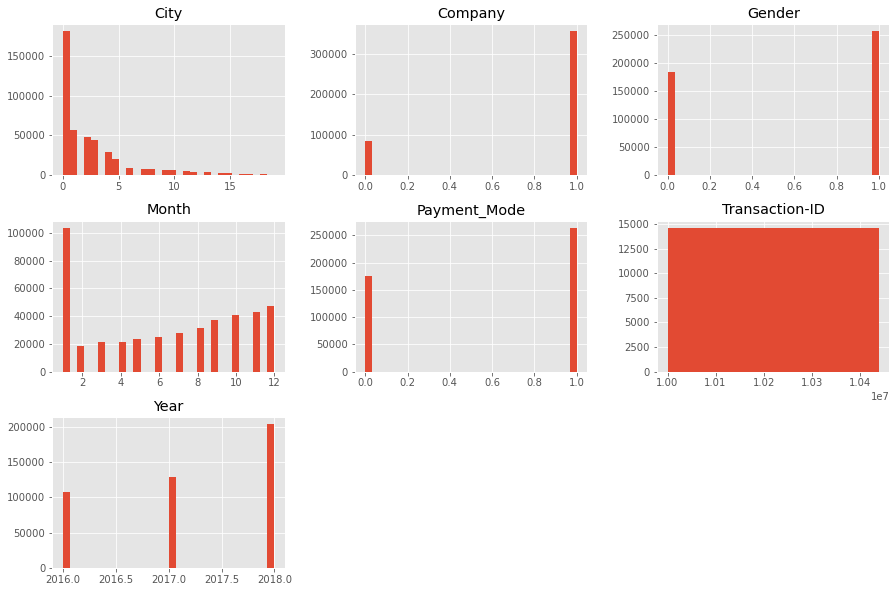

In [70]:
merge_3.hist(bins=30,figsize = (15,10))

It seems that NYC and Jan are outliers from their categories. These outliers can manipulate ML Models.

 4. **Data Binning** <br>
In this phase, I may introduce an interval that replaces the original value of all entries. In other words, except the those of ones within some ranges, I may delete all values. However, this step hurts my analysis because some columns include unique values such as Transaction ID's and Customer ID's. <br>
Thus, I am skipping this step.

5. **Data Scaling**
Machines don’t understand scale as we do. A person can easily find the difference between his/hers salary and his/hers weight, knowing that it is impossible to weigh as much as you receive monthly, but the computer does not; That’s the entire data set must be scaled **if M.L. algorithms will be used**. In a basic way, there are two ways to scale: Standardization and Normalization. In this step, as I am not going to use any ML algorithm, I'll skip this step.

<font color=red>**Which company has maximum cab users at a particular time period?**
</font>

CONVERTING XL DATE FORMAT TO REGULAR FORMAT

In [107]:
import xlrd
from datetime import datetime

In [108]:
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

In [109]:
merge_3['Date-of-Travel'] = pd.to_datetime(merge_3['Date-of-Travel'].apply(read_date), errors='coerce')

In [110]:
merge_3['Date-of-Travel']

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
440094   2018-01-05
440095   2018-01-05
440096   2018-01-05
440097   2018-01-05
440098   2018-01-05
Name: Date-of-Travel, Length: 440099, dtype: datetime64[ns]

SPREADING DATE OF TRAVEL TO MONTHS AND YEARS FOR OUR ANALYSIS

In [111]:
months=[]
years =[]
for i in range(len(merge_3['Date-of-Travel'])):
    months.append(merge_3['Date-of-Travel'][i].month)
    years.append(merge_3['Date-of-Travel'][i].year)
merge_3['Month'] = months
merge_3['Year'] = years

In [27]:
merge_3.head(3)

,Transaction-ID,Date-of-Travel,Company,City,KM-Travelled,Price-Charged,Cost-of-Trip,Population,Users,Customer-ID,Gender,Age,Income(USD/Month),Payment_Mode,Month,Year
0,1e+07,2016-01-08,0,8,30.45,370.95,313.635,"814,885","24,701",29290,1,28,10813,1,1,2016
1,1e+07,2016-01-06,0,8,28.62,358.52,334.854,"814,885","24,701",27703,1,27,9237,1,1,2016
2,1e+07,2016-01-02,0,8,9.04,125.2,97.632,"814,885","24,701",28712,1,53,11242,0,1,2016


**maximum cab users by month**

In [60]:
# Monthly
pinkusersmonthly =merge_3[merge_3.Company==0].groupby('Month')['Transaction-ID'].count()
yellowusersmonthly = merge_3[merge_3.Company==1].groupby('Month')['Transaction-ID'].count()

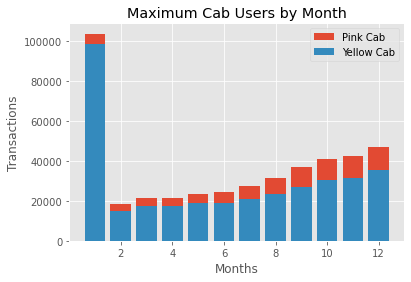

In [61]:
plt.bar(pinkusersmonthly.index,pinkusersmonthly,bottom= yellowusersmonthly,label = "Pink Cab")
plt.bar(yellowusersmonthly.index, yellowusersmonthly, label = "Yellow Cab")
plt.xlabel("Months")
plt.ylabel("Transactions")
plt.title("Maximum Cab Users by Month")
plt.legend()
plt.style.use("ggplot")
plt.show()

On montly basis, January is the maximum cab users for both companies, while the February is the least. In all months, Pink Cab has more customer than Yellow Cab.

**maximum cab users by year**

In [62]:
#Yearly
pinkusersyearly =merge_3[merge_3.Company==0].groupby('Year')['Transaction-ID'].count()
yellowusersyearly = merge_3[merge_3.Company==1].groupby('Year')['Transaction-ID'].count()

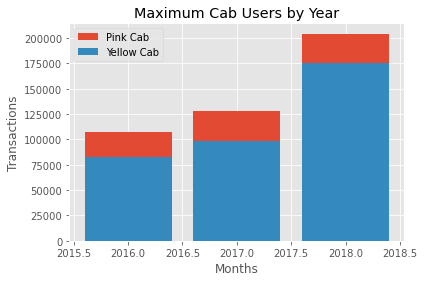

In [67]:
plt.bar(pinkusersyearly.index,pinkusersyearly,bottom= yellowusersyearly,label = "Pink Cab")
plt.bar(yellowusersyearly.index, yellowusersyearly, label = "Yellow Cab")
plt.xlabel("Months")
plt.ylabel("Transactions")
plt.title("Maximum Cab Users by Year")
plt.legend()
plt.style.use("ggplot")
plt.show()

On yearly basis, 2018 is the maximum cab users for both companies, while the 2016 is the least. In all years, Pink Cab has more customer than Yellow Cab.